<a href="https://colab.research.google.com/github/TofayelAhmmedBabu/HandWritten-Number-Classification/blob/main/MNIST_handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*import libraries*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

*dataset loading*

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

X_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

Y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

X_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

Y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
Y_test.shape

(10000,)

*Printing 15'th image*

In [ ]:
print(X_train[15])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 121 162
  253 253 213   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 107 170 25

In [ ]:
print(X_train[15].shape)

(28, 28)


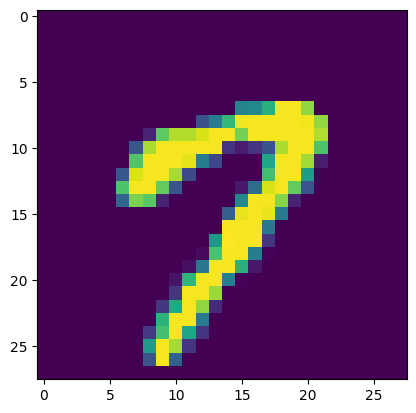

7


In [ ]:
# display the image
plt.imshow(X_train[15])
plt.show()

#print the correspoding level
print(Y_train[15])

*Image label*

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique value in Y_train
print(np.unique(Y_train))

# unique value in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


*image level Categorical Encoding*


*  *make all the values same dimension*



In [ ]:
#scaling the values

X_train = X_train / 255
X_test = X_test / 255

In [ ]:
#see what's happen after scaling: all values are between (0-1)
print(X_train[15])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

*Building the NN(Neural Network)*


In [ ]:
# setting up the layers of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # keras.layers.Dense(50, activation = 'relu'),
    # keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10,  activation = 'sigmoid')
])

In [ ]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1395 - accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1072 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0858 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0722 - accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0621 - accuracy: 0.9798
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0531 - accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0466 - accuracy: 0.9847
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0419 - accuracy: 0.9866
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0369 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.032

In [ ]:
# predict on the testing data
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# accuracy on test data
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9708
0.97079998254776


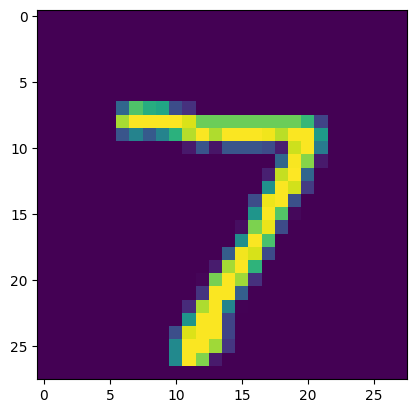

7


In [ ]:
# first datapoint in X_test
plt.imshow(X_test[0])
plt.show()

# print y label
print(Y_test[0])

In [ ]:
y_pred[0]

array([6.8830515e-05, 9.9013433e-02, 1.0486601e-01, 7.3495609e-01,
       1.8749196e-07, 4.7436394e-03, 6.7619854e-10, 9.9999446e-01,
       4.2676634e-01, 5.9551109e-02], dtype=float32)

In [ ]:
# converting the prediction probabilities to class label

class_level_y_pred_0 = np.argmax(y_pred[0])
class_level_y_pred_0

7

In [ ]:
y_pred_levels = [np.argmax(i) for i in y_pred]
print(y_pred_levels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 3, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
y_pred_levels[0]

7

*confusion matrix*

In [ ]:
cmat = confusion_matrix(Y_test, y_pred_levels)
cmat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    3,    2,    1,    2,    3,    0,    2,    0],
       [   1, 1117,    5,    1,    0,    2,    4,    1,    4,    0],
       [   3,    2, 1005,    8,    2,    0,    1,    0,   10,    1],
       [   4,    0,   11,  976,    0,    7,    0,    2,    8,    2],
       [   3,    0,    6,    1,  939,    3,    4,    4,    2,   20],
       [   2,    0,    0,   13,    0,  860,    7,    1,    5,    4],
       [   4,    2,    4,    2,    4,    3,  935,    0,    4,    0],
       [   2,    7,    9,    2,    0,    0,    0,  996,    8,    4],
       [   5,    1,    3,    6,    4,    8,    1,    3,  940,    3],
       [   3,    3,    0,    7,    7,    2,    0,    6,    9,  972]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Label')

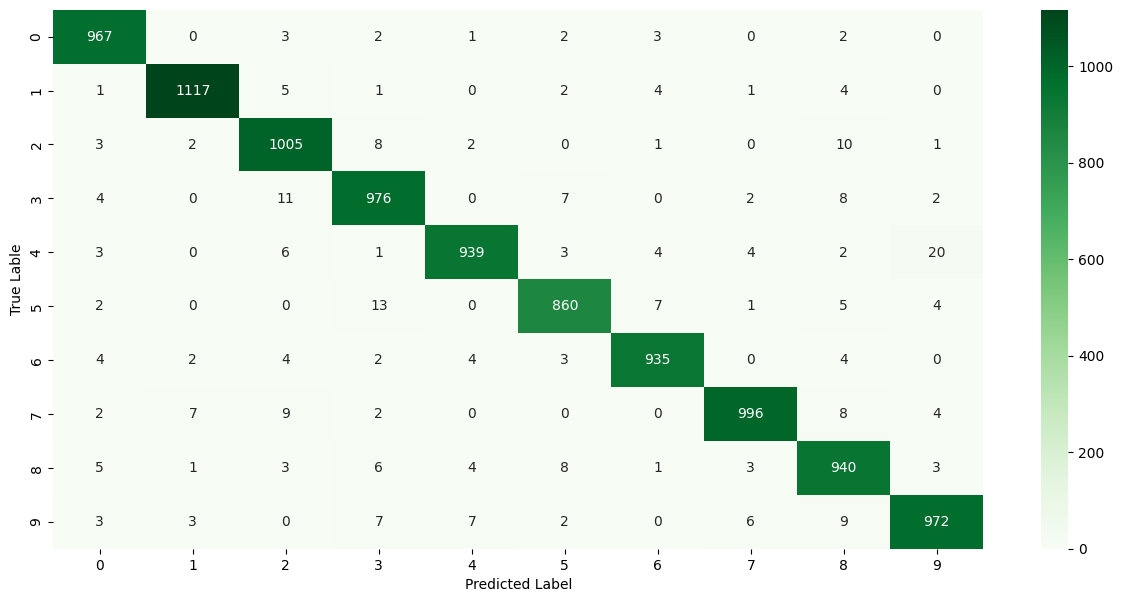

In [ ]:
plt.figure(figsize  = (15, 7))
sns.heatmap(cmat, annot = True, fmt = 'd', cmap = 'Greens')
plt.ylabel('True Lable')
plt.xlabel('Predicted Label')

*building a predictive system*


In [ ]:
input_image_path = 'sample_image-300x298.webp'
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
input_image

array([[[118, 118, 118],
        [ 65,  65,  65],
        [ 76,  76,  76],
        ...,
        [ 72,  72,  72],
        [ 75,  75,  75],
        [185, 185, 185]],

       [[ 73,  73,  73],
        [ 10,  10,  10],
        [  8,   8,   8],
        ...,
        [  7,   7,   7],
        [ 15,  15,  15],
        [170, 170, 170]],

       [[ 79,  79,  79],
        [ 13,  13,  13],
        [  5,   5,   5],
        ...,
        [  0,   0,   0],
        [  6,   6,   6],
        [165, 165, 165]],

       ...,

       [[ 72,  72,  72],
        [  3,   3,   3],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  5,   5,   5],
        [178, 178, 178]],

       [[ 72,  72,  72],
        [  3,   3,   3],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  5,   5,   5],
        [178, 178, 178]],

       [[ 72,  72,  72],
        [  3,   3,   3],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  5,   5,   5],
        [178, 178, 178]]

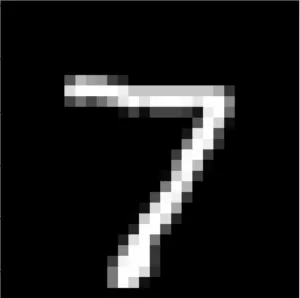

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape


(298, 300, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)


In [ ]:
grayscale.shape

(298, 300)

In [ ]:
# resize
input_image = cv2.resize(grayscale, (28, 28))


In [ ]:
input_image.shape

(28, 28)

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image

array([[[0.00392157, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.00392157, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [ ]:
input_image = input_image / 255

In [ ]:
input_image


array([[[0.00392157, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.00392157, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [ ]:
# reshape
input_image = np.reshape(input_image, [1, 28, 28])

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
input_image_predict = model.predict(input_image)

1/1 [==============================] - 0s 18ms/step


In [ ]:
input_image_predict

array([[6.93559050e-05, 9.77205932e-02, 1.04144886e-01, 7.38102496e-01,
        1.81456073e-07, 4.79719276e-03, 6.61635191e-10, 9.99994278e-01,
        4.33343858e-01, 6.09261245e-02]], dtype=float32)

In [ ]:
input_image_predict = np.argmax(input_image_predict)

In [ ]:
input_image_predict

7

#   Number predict


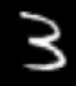

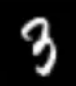

PIL.Image.Image

In [ ]:
from IPython.display import display

# Load the image
image = Image.open('Numbers/number2.png')

# Get the width and height of the image
width, height = image.size

# Specify the number of horizontal pieces
num_pieces = 2

# Calculate the width of each piece
piece_width = width // num_pieces

# Slice the image into horizontal pieces
sliced_images = [image.crop((i * piece_width, 0, (i + 1) * piece_width, height)) for i in range(num_pieces)]

# Display each sliced image
for idx, sliced_image in enumerate(sliced_images):
    display(sliced_image)
    print()

type(sliced_image)


In [ ]:
digits = np.array([np.array(img) for img in sliced_images])

In [ ]:
type(digits)

numpy.ndarray

In [ ]:
digits
digits.shape

(2, 86, 76, 4)

In [ ]:
resized_gray_digits = np.empty((len(digits), 28, 28))

# Resize and convert each image in digits to grayscale, then store in resized_gray_digits
for i in range(len(digits)):
    resized_gray_digits[i] = cv2.cvtColor(cv2.resize(digits[i], (28, 28)), cv2.COLOR_BGR2GRAY)



In [ ]:
for i in range(len(resized_gray_digits)) :
  cv2_imshow(resized_gray_digits[i])
  print()

In [ ]:
resized_gray_digits.shape

(2, 28, 28)

In [ ]:
resized_gray_digits = resized_gray_digits / 255

In [ ]:
resized_gray_digits


array([[[0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.00392157],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.00392157,
         0.00392157, 0.00392157],
        [0.        , 0.        , 0.        , ..., 0.00392157,
         0.00392157, 0.00392157],
        [0.        , 0.        , 0.        , ..., 0.00392157,
         0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.00392157, 0.00392157],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
         0.        , 0.        ],
        [0.0

In [ ]:
digits_pred = model.predict(resized_gray_digits)

1/1 [==============================] - 0s 24ms/step


In [ ]:
digits_ = [np.argmax(i) for i in digits_pred]
print('predicted number: ', end = '')
for i in digits_:
  print(i, end='')

predicted number: 33